# Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.experimental import (
    enable_iterative_imputer,
)
from sklearn import (
    ensemble,
    impute,
    model_selection,    
    preprocessing,
    tree,
)

# url = (
#     "http://biostat.mc.vanderbilt.edu/"
#     "wiki/pub/Main/DataSets/titanic3.xls"
# )
df = pd.read_excel("titanic3.xls")
def tweak_titanic(df):
    df = df.drop(
        columns=[
            "name",
            "ticket",
            "home.dest",
            "boat",
            "body",
            "cabin",
        ]
    ).pipe(pd.get_dummies, drop_first=True)
    return df

def get_train_test_X_y(
    df, y_col, size=0.3, std_cols=None
):
    y = df[y_col]
    X = df.drop(columns=y_col)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
        X, y, test_size=size, random_state=42
    )
    cols = X.columns
    num_cols = [
        "pclass",
        "age",
        "sibsp",
        "parch",
        "fare",
    ]
    fi = impute.IterativeImputer()

    fitted = fi.fit_transform(X_train[num_cols])
    X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(num_cols)})
    test_fit = fi.transform(X_test[num_cols])
    X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(num_cols)})
    if std_cols:
        std = preprocessing.StandardScaler()
        fitted = std.fit_transform(X_train[std_cols])
        X_train = X_train.assign(**{c:fitted[:,i] for i, c in enumerate(std_cols)})
        test_fit = std.transform(X_test[std_cols])
        X_test = X_test.assign(**{c:test_fit[:,i] for i, c in enumerate(std_cols)})

    return X_train, X_test, y_train, y_test

ti_df = tweak_titanic(df)
std_cols = "pclass,age,sibsp,fare".split(",")
X_train, X_test, y_train, y_test = get_train_test_X_y(
    ti_df, "survived", std_cols=std_cols
)

X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [2]:
from sklearn.linear_model import (
    LogisticRegression,
)
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)
lr.predict(X.iloc[[0]])
lr.predict_proba(X.iloc[[0]])
lr.predict_log_proba(X.iloc[[0]])
lr.decision_function(X.iloc[[0]])

array([-2.1705983])

In [3]:
lr.intercept_

array([1.284538])

In [4]:
def inv_logit(p):
    return np.exp(p) / (1 + np.exp(p))
inv_logit(lr.intercept_)

array([0.78322125])

In [5]:
cols = X.columns
for col, val in sorted(
    zip(cols, lr.coef_[0]),
    key=lambda x: x[1],
    reverse=True,
):
    print(
        f"{col:10}{val:10.3f} {inv_logit(val):10.3f}"
    )

fare           0.102      0.525
parch         -0.071      0.482
sibsp         -0.272      0.432
age           -0.294      0.427
embarked_Q    -0.544      0.367
embarked_S    -0.549      0.366
pclass        -0.736      0.324
sex_male      -2.435      0.081


/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


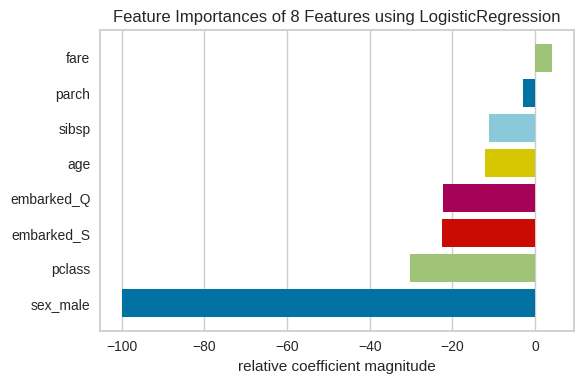

In [6]:
from yellowbrick.model_selection import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(lr)
fi_viz.fit(X, y)
fi_viz.poof();
#fig.savefig("images/mlpr_1001.png", dpi=300)

In [7]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb.score(X_test, y_test)
nb.predict(X.iloc[[0]])
nb.predict_proba(X.iloc[[0]])
nb.predict_log_proba(X.iloc[[0]])

array([[-0.04128744, -3.20776957]])

In [8]:
from sklearn.svm import SVC
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
svc.predict(X.iloc[[0]])
svc.predict_proba(X.iloc[[0]])
svc.predict_log_proba(X.iloc[[0]])

array([[-0.16538708, -1.8810207 ]])

In [9]:
from sklearn.neighbors import (
    KNeighborsClassifier,
)
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
knc.score(X_test, y_test)
knc.predict(X.iloc[[0]])
knc.predict_proba(X.iloc[[0]])

array([[0.8, 0.2]])

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(
    random_state=42, max_depth=3
)
dt.fit(X_train, y_train)
dt.score(X_test, y_test)
dt.predict(X.iloc[[0]])
dt.predict_proba(X.iloc[[0]])
dt.predict_log_proba(X.iloc[[0]])

array([[-0.12835003, -2.11648281]])

In [11]:
# import pydotplus
# from io import StringIO
# from sklearn.tree import export_graphviz
# dot_data = StringIO()
# tree.export_graphviz(
#     dt,
#     out_file=dot_data,
#     feature_names=X.columns,
#     class_names=["Died", "Survived"],
#     filled=True,
# )
# g = pydotplus.graph_from_dot_data(
#     dot_data.getvalue()
# )
# #g.write_png("images/mlpr_1002.png")

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


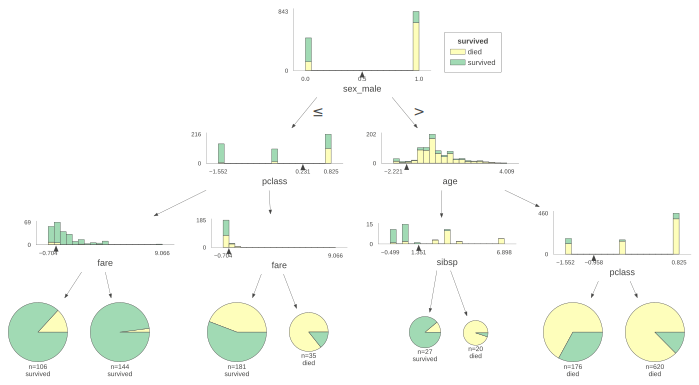

In [12]:
import dtreeviz
viz = dtreeviz.model(
    dt,
    X,
    y,
    target_name="survived",
    feature_names=X.columns,
    class_names=["died", "survived"],
)
viz.view(fontname='sans-serif')

In [13]:
for col, val in sorted(
    zip(X.columns, dt.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_male       0.607
pclass         0.248
sibsp          0.052
fare           0.050
age            0.043


/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


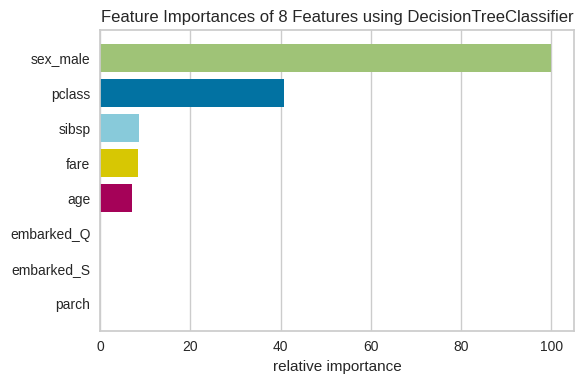

In [14]:
from yellowbrick.model_selection import (
    FeatureImportances,
)
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(dt)
fi_viz.fit(X, y)
fi_viz.poof();
#fig.savefig("images/mlpr_1004.png", dpi=300)

In [15]:
from sklearn.ensemble import (
    RandomForestClassifier,
)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
rf.predict(X.iloc[[0]])
rf.predict_proba(X.iloc[[0]])
rf.predict_log_proba(X.iloc[[0]])

array([[-0.03822121, -3.28341435]])

In [16]:
for col, val in sorted(
    zip(X.columns, rf.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

age            0.285
fare           0.262
sex_male       0.241
pclass         0.089
sibsp          0.050


In [17]:
import rfpimp
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rfpimp.importances(
    rf, X_test, y_test
).Importance

Feature
sex_male      0.152672
pclass        0.033079
age           0.030534
parch         0.010178
sibsp         0.007634
fare          0.007634
embarked_Q   -0.002545
embarked_S   -0.002545
Name: Importance, dtype: float64

In [18]:
import xgboost as xgb
xgb_class = xgb.XGBClassifier(random_state=42)
xgb_class.fit(
    X_train,
    y_train,
    #early_stopping_rounds=10,
    eval_set=[(X_test, y_test)],
)
xgb_class.score(X_test, y_test)
xgb_class.predict(X.iloc[[0]])
xgb_class.predict_proba(X.iloc[[0]])

[0]	validation_0-logloss:0.57684
[1]	validation_0-logloss:0.52047
[2]	validation_0-logloss:0.49376
[3]	validation_0-logloss:0.48312
[4]	validation_0-logloss:0.47397
[5]	validation_0-logloss:0.46727
[6]	validation_0-logloss:0.46381
[7]	validation_0-logloss:0.46294
[8]	validation_0-logloss:0.46224
[9]	validation_0-logloss:0.46275
[10]	validation_0-logloss:0.45911
[11]	validation_0-logloss:0.45650
[12]	validation_0-logloss:0.45601
[13]	validation_0-logloss:0.45127
[14]	validation_0-logloss:0.45861
[15]	validation_0-logloss:0.45723
[16]	validation_0-logloss:0.45521
[17]	validation_0-logloss:0.45611
[18]	validation_0-logloss:0.45521
[19]	validation_0-logloss:0.45502
[20]	validation_0-logloss:0.45280
[21]	validation_0-logloss:0.45339
[22]	validation_0-logloss:0.45656
[23]	validation_0-logloss:0.45702
[24]	validation_0-logloss:0.45732
[25]	validation_0-logloss:0.46298
[26]	validation_0-logloss:0.46210
[27]	validation_0-logloss:0.46335
[28]	validation_0-logloss:0.46442
[29]	validation_0-loglos

array([[0.9776443 , 0.02235568]], dtype=float32)

In [19]:
for col, val in sorted(
    zip(
        X.columns,
        xgb_class.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

sex_male       0.518
pclass         0.252
sibsp          0.063
fare           0.040
embarked_S     0.036


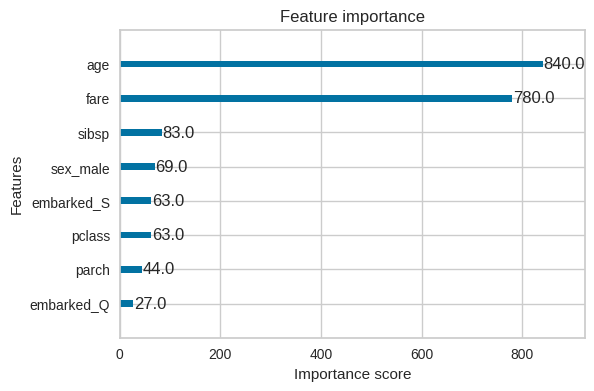

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_importance(xgb_class, ax=ax);
#fig.savefig("images/mlpr_1005.png", dpi=300)

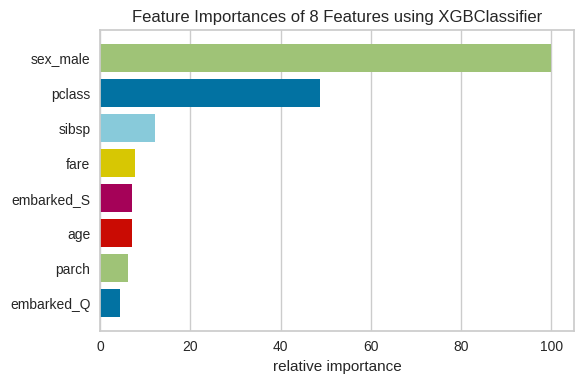

In [21]:
fig, ax = plt.subplots(figsize=(6, 4))
fi_viz = FeatureImportances(xgb_class)
fi_viz.fit(X, y)
fi_viz.poof();
#fig.savefig("images/mlpr_1006.png", dpi=300)

In [22]:
booster = xgb_class.get_booster()
print(booster.get_dump()[0])

0:[sex_male<1] yes=1,no=2,missing=2
	1:[pclass<0.825247765] yes=3,no=4,missing=4
		3:leaf=0.725141108
		4:[fare<-0.202066973] yes=7,no=8,missing=8
			7:[age<-0.387676835] yes=13,no=14,missing=14
				13:[age<-0.517409861] yes=23,no=24,missing=24
					23:[age<-0.673487127] yes=37,no=38,missing=38
						37:leaf=0.327205956
						38:leaf=-0.272758305
					24:leaf=0.461487889
				14:[age<-0.166698784] yes=25,no=26,missing=26
					25:[fare<-0.352959305] yes=39,no=40,missing=40
						39:leaf=-0.287809044
						40:leaf=0.166197002
					26:[age<-0.166507855] yes=41,no=42,missing=42
						41:leaf=0.397555202
						42:leaf=0.037443269
			8:[age<-0.499368906] yes=15,no=16,missing=16
				15:[age<-1.76602781] yes=27,no=28,missing=28
					27:leaf=-0.112369277
					28:leaf=-0.374329567
				16:leaf=-0.0607327335
	2:[age<-1.4538734] yes=5,no=6,missing=6
		5:[sibsp<1.35050142] yes=9,no=10,missing=10
			9:[age<-2.16272163] yes=17,no=18,missing=18
				17:leaf=0.166197002
				18:leaf=0.609956861
			10:leaf=

In [23]:
# score from first tree leaf 7
1 / (1 + np.exp(-1 * 0.1238))

0.5309105310475829

/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 


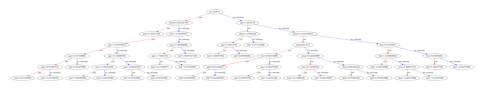

In [24]:
fig, ax = plt.subplots(figsize=(6, 4))
xgb.plot_tree(xgb_class, ax=ax, num_trees=0);
#fig.savefig("images/mlpr_1007.png", dpi=300)

In [25]:
import xgbfir
xgbfir.saveXgbFI(
    xgb_class,
    feature_names=X.columns,
    OutputXlsxFile="fir.xlsx",
)
pd.read_excel("fir.xlsx").head(3).T

,0,1,2
Interaction,sex_male,fare,age
Gain,528.462674,462.208324,447.773328
FScore,69,780,840
wFScore,43.483329,231.048995,215.850085
Average wFScore,0.630193,0.296217,0.256964
Average Gain,7.658879,0.592575,0.533063
Expected Gain,521.619201,127.12865,116.925225
Gain Rank,1,2,3
FScore Rank,4,2,1
wFScore Rank,3,1,2


In [26]:
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 1",
).head(2).T

,0,1
Interaction,pclass|sex_male,age|sex_male
Gain,704.437878,573.815003
FScore,21,64
wFScore,8.220074,24.028737
Average wFScore,0.391432,0.375449
Average Gain,33.544661,8.965859
Expected Gain,262.592399,348.748436
Gain Rank,1,2
FScore Rank,15,5
wFScore Rank,12,4


In [27]:
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
).head(1).T

,0
Interaction,fare|pclass|sex_male
Gain,986.832202
FScore,28
wFScore,6.084617
Average wFScore,0.217308
Average Gain,35.244007
Expected Gain,184.169833
Gain Rank,1
FScore Rank,16
wFScore Rank,14


In [28]:
pd.read_excel(
    "fir.xlsx",
    sheet_name="Interaction Depth 2",
)[["Interaction", "Gain"]].head()

,Interaction,Gain
0,fare|pclass|sex_male,986.832202
1,age|sex_male|sibsp,587.588024
2,age|pclass|sex_male,547.701767
3,age|age|fare,531.385460
4,age|fare|pclass,444.946414


In [29]:
import lightgbm as lgb
lgbm_class = lgb.LGBMClassifier(
    random_state=42
)
lgbm_class.fit(X_train, y_train)
lgbm_class.score(X_test, y_test)
lgbm_class.predict(X.iloc[[0]])
lgbm_class.predict_proba(X.iloc[[0]])

array([[0.97943185, 0.02056815]])

In [30]:
for col, val in sorted(
    zip(cols, lgbm_class.feature_importances_),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

age         1254.000
fare        1226.000
pclass       117.000
embarked_S   100.000
sibsp         89.000


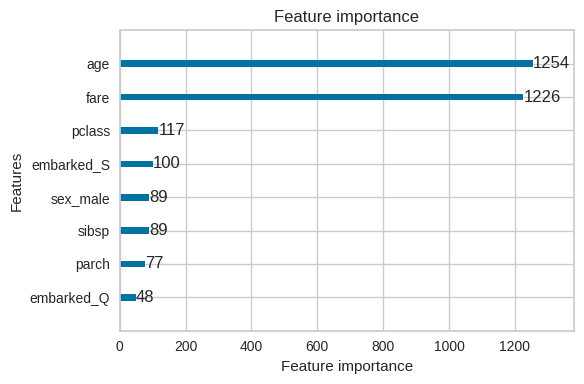

In [31]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_importance(lgbm_class, ax=ax)
fig.tight_layout()
#fig.savefig("images/mlpr_1008.png", dpi=300)

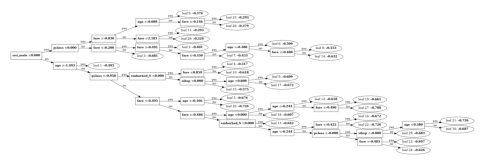

In [32]:
fig, ax = plt.subplots(figsize=(6, 4))
lgb.plot_tree(lgbm_class, tree_index=0, ax=ax);
#fig.savefig("images/mlpr_1009.png", dpi=300)

In [33]:
import janitor as jn
from catboost import CatBoostClassifier
cat_df = df.copy()
cat_df = cat_df.drop(
    [
        "name",
        "ticket",
        "home.dest",
        "boat",
        "body",
        "cabin",
    ],
    axis=1,
)
numeric_cols = cat_df.select_dtypes(include=[np.number]).columns
object_cols = cat_df.select_dtypes(include=[object]).columns
cat_df[numeric_cols] = cat_df[numeric_cols].fillna(cat_df[numeric_cols].median())
cat_df[object_cols] = cat_df[object_cols].fillna("missing")
cat_X, cat_y = jn.get_features_targets(
    cat_df, target_columns="survived"
)
X_train3, X_test3, y_train3, y_test3 = model_selection.train_test_split(
    cat_X,
    cat_y,
    test_size=0.3,
    random_state=42,
)
cat_idxs = np.where(cat_X.dtypes == object)[0]
cb = CatBoostClassifier(random_state=42)
cb.fit(
    X_train3,
    y_train3,
    cat_features=cat_idxs,
    plot=True,
)
cb.score(X_test3, y_test3)

/tmp/ipykernel_3863353/3558693087.py:19: FutureWarning: get_features_targets() has moved. Please use ml.get_features_targets().
/home/nglazov@pak-cspmz.ru/.virtualenvs/r-tensorflow/lib/python3.10/site-packages/janitor/utils.py:366: DeprecationWarning: target_columns is deprecated; use target_column_names


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.009923
0:	learn: 0.6871733	total: 52.7ms	remaining: 52.6s
1:	learn: 0.6809450	total: 56.4ms	remaining: 28.1s
2:	learn: 0.6751306	total: 60.1ms	remaining: 20s
3:	learn: 0.6696186	total: 63.5ms	remaining: 15.8s
4:	learn: 0.6661256	total: 65.4ms	remaining: 13s
5:	learn: 0.6605950	total: 68.3ms	remaining: 11.3s
6:	learn: 0.6574164	total: 70.2ms	remaining: 9.96s
7:	learn: 0.6523702	total: 73.3ms	remaining: 9.09s
8:	learn: 0.6470302	total: 76.9ms	remaining: 8.47s
9:	learn: 0.6440684	total: 78.7ms	remaining: 7.79s
10:	learn: 0.6396224	total: 80.9ms	remaining: 7.27s
11:	learn: 0.6351698	total: 83.6ms	remaining: 6.88s
12:	learn: 0.6307152	total: 86ms	remaining: 6.53s
13:	learn: 0.6261520	total: 88.8ms	remaining: 6.25s
14:	learn: 0.6224333	total: 90.7ms	remaining: 5.95s
15:	learn: 0.6185786	total: 93.2ms	remaining: 5.73s
16:	learn: 0.6149004	total: 95.5ms	remaining: 5.52s
17:	learn: 0.6112778	total: 97.6ms	remaining: 5.33s
18:	learn: 0.6074382	total: 100ms	remaining: 5.18s

0.8015267175572519

In [34]:
for col, val in sorted(
    zip(
        X_test3.columns,
        cb.feature_importances_,
    ),
    key=lambda x: x[1],
    reverse=True,
)[:5]:
    print(f"{col:10}{val:10.3f}")

sex           37.714
pclass        16.354
fare          14.465
age           13.468
embarked       9.909


In [35]:
# from autosklearn.classification import (
#     AutoSklearnClassifier,
# )
# asc = AutoSklearnClassifier(
#     time_left_for_this_task=240
# )
# asc.fit(X_train, y_train)
# asc.score(X_test, y_test)
# asc.predict(X.iloc[[0]])
# asc.predict_proba(X.iloc[[0]])

In [36]:
from tpot import TPOTClassifier
tc = TPOTClassifier(generations=2)
tc.fit(X_train, y_train)
tc.score(X_test, y_test)
tc.predict(X.iloc[[0]])
tc.predict_proba(X.iloc[[0]])

/home/nglazov@pak-cspmz.ru/envs/automl/lib/python3.12/site-packages/requests/__init__.py:43: DeprecationWarning: 'urllib3[secure]' extra is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
/home/nglazov@pak-cspmz.ru/envs/automl/lib/python3.12/site-packages/update_checker.py:160: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
Version 0.12.2 of tpot is outdated. Version 1.1.0 was released 4 days ago.


array([[0.90667634, 0.09332366]])

In [37]:
tc.export("tpot_exported_pipeline.py")